# Review (복습)
- Machine Learning : (True) Function Approxmation (함수 근사)
    - Based on Data.
    - f(x) = y
    - 함수가 x와 y의 관계를 설명해줄 수 있는지
    - 전체 함수에서 f를 근사하라고 하는 건 너무 광범위 하다.
    - 특수한 함수들의 모임에 대해서 생각을 했다.
        - 제한시켜주는 공간에서 함
            - RF
                - Tree
            - 신경망 <br>
    - 실제 f는 어딘가에 살고 있을 것이다.
        - 그러면 어떤 집합을 선택해야
            - 그걸 다루는 게 통계적 이론이다. Statistical Learning Theory
            - Cross Validation
            
    - obj : f를 찾아라
        - 1) 제한을 시킨다 = Model을 선택한다.
            - ex) y = ax + b
        - 2) 제한시킨 함수들의 공간에서 하나를 뽑아낸다.
            - a_hat, b_hat을 추정한다.
            - 여러 가지가 있을 수 있다.
                - 그중에서 a, b를 효율적으로 추정하기 위해서 __'경사하강법'__을 사용한다.
        - 3) 평가를 내란디.
            - 제한을 시켰는데, 그 가정이 얼마나 타당했는가?
            - 타당했다면, 그 함수가 좋아야 한다. (실제 f랑 비슷해야 한다.)
            - 1단계의 가정이 얼마나 타당했는지 평가를 한다.
            - Cross Validation(자주 사용), R-Squared
            
- Cross Validation의 목적
    - 1) 가장 좋은 가정을 선택 (Which Model?)
        - CV는 Train set을 사용한다.
        
- Test-Set의 목적
    - 1) 실제로 현실에서 얼마나 좋을까? 검증
        - CV로 검증을 한 다음에 최종적으로 딱! 한번 Test
        
- CV의 방법
    - 1) Validation set approach
    - 2) k-fold cross validation
    - 3) LooCV
    
- Case 1
    - Train set을 가지고, 3000번을 training했는데
        - 모델 A(3000개의 모델 중 선택)
            - training error = 0, validation error = 0.1
            - Test error = 100
            - 이런 상황을 해결하는 방법은 데이터를 진짜 많이 모으면 해결이 될 것이다.
            - 아니라고 생각해서 실험을 10만 번을 더해서, 모델 Z를 뽑음 
        - 모델 Z(10만 개의 모델 중 선택)
            - tr = 0.01
            - val = 0.3
            - test error = 10
            - 쓰면 안 된다. 비교하는데 test set을 썼기에, 오염됐다.
            - (철학적으로 봤을 때) test error 높아질 것이다.
            - (실제 세계에서는 그렇게 높아지지 않겠지만...)
            - 근데 현업에서는 어느 정도 허용, 논문에서는 불허

 - Case 2
     - case 1을 다시 생각해보기
     - 실험을 3000번 했는데, test error가 높았다.
     - test set과 training set을 섞었다.
     
 - test err = generalization err
     - statistics vs. machine learning

# 1. Load Dataset
- 비식별화
    - input의 의미를 알 수는 없다.
- task : target을 예측
- columns(4993) > data row (4459)
    - 컬럼이 데이터 보다 더 많은 특이한 경우
        - <E

In [2]:
data <- read.csv("../../../../Downloads/Kaggle/Santander Value Prediction Challenge//train.csv")

str(data)

'data.frame':	4459 obs. of  4993 variables:
 $ ID        : Factor w/ 4459 levels "000d6aaf2","000fbd867",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ target    : num  38000000 600000 10000000 2000000 14400000 2800000 164000 600000 979000 460000 ...
 $ X48df886f9: num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0deb4b6a8: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X34b15f335: num  0 0 0 0 0 0 0 0 0 0 ...
 $ a8cb14b00 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X2f0771a37: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X30347e683: int  0 0 0 0 0 0 0 0 0 0 ...
 $ d08d1fbe3 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X6ee66e115: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X20aa07010: num  0 2200000 0 0 2000000 ...
 $ dc5a8f1d8 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X11d86fa6a: num  0 0 0 0 0 8000 0 0 0 0 ...
 $ X77c9823f2: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X8d6c2a0b2: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X4681de4fd: int  0 0 0 0 0 0 0 0 22000 0 ...
 $ adf119b9a : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cff75dd09 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X96f83a237: int  0 0 0 0 0 0 0 0 0 0 ...
 $ b8a7

# 2. Missing Data
- 빼거나
- 채우거나

- [김재광](http://mathsci.kaist.ac.kr/newsletter/article-tags/%EA%B9%80%EC%9E%AC%EA%B4%91/)

In [3]:
sum(is.na(data))

[1] 0

# 3. Separate Data

In [4]:
set.seed(1)
train <- sample(1:nrow(data), 0.7 * nrow(data))

set.seed(1)
valid <- sample(setdiff(1:nrow(data), train), 0.15 * nrow(data))

test <- setdiff(1:nrow(data), c(train, valid))

In [8]:
length(train)
length(valid)
length(test)

[1] 3121

[1] 668

[1] 670

## RMSLE 1
- The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

In [12]:
RMSLE <- function(pred, real){

    err <- sqrt(mean((log(pred + 1) - log(real + 1))^2))
    
    return (err)
}

## RMSLE 2
- The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

In [34]:
RMSLE <- function(pred, real){

    err <- sqrt(mean((log(pmax(0, pred) + 1) - log(real + 1))^2))
    
    return (err)
}

## Random Forest
- ranger package
    - predict할 때, 특이한 방법이 있다.
        - 마지막에 $표시를 붙임

In [15]:
library(ranger)

In [21]:
Model <- ranger(target~. -ID, data= data[train, ], mtry = 300) # target을 제외한 컬럼을 사용하는데 그 중에서도 ID 컬럼은 예측하는데 필요 없다.

Growing trees.. Progress: 15%. Estimated remaining time: 2 minutes, 50 seconds.
Growing trees.. Progress: 32%. Estimated remaining time: 2 minutes, 15 seconds.
Growing trees.. Progress: 48%. Estimated remaining time: 1 minute, 41 seconds.
Growing trees.. Progress: 64%. Estimated remaining time: 1 minute, 9 seconds.
Growing trees.. Progress: 81%. Estimated remaining time: 37 seconds.
Growing trees.. Progress: 97%. Estimated remaining time: 5 seconds.


In [22]:
Model

Ranger result

Call:
 ranger(target ~ . - ID, data = data[train, ], mtry = 300) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      3121 
Number of independent variables:  4991 
Mtry:                             300 
Target node size:                 5 
Variable importance mode:         none 
OOB prediction error (MSE):       4.930132e+13 
R squared (OOB):                  0.2623842 

In [23]:
pred <- predict(Model, data[valid, ])$predictions

In [24]:
RMSLE(pred, data$target[valid])

[1] 1.731769

In [26]:
params <- c(500, 2000, 4000)

for (i in 1:5){

    Model <- ranger(target~. -ID,
                    data= data[train, ],
                    mtry = params[i])
    
    pred <- predict(Model, data[valid, ])$predictions
    err <- RMSLE(pred, data$target[valid])
    
    cat("mtry가", params[i], "일 때,", "error는", err)
    
}

Growing trees.. Progress: 9%. Estimated remaining time: 5 minutes, 13 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 4 minutes, 27 seconds.
Growing trees.. Progress: 29%. Estimated remaining time: 3 minutes, 50 seconds.
Growing trees.. Progress: 39%. Estimated remaining time: 3 minutes, 13 seconds.
Growing trees.. Progress: 49%. Estimated remaining time: 2 minutes, 42 seconds.
Growing trees.. Progress: 60%. Estimated remaining time: 2 minutes, 7 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 1 minute, 34 seconds.
Growing trees.. Progress: 80%. Estimated remaining time: 1 minute, 1 seconds.
Growing trees.. Progress: 91%. Estimated remaining time: 29 seconds.


ERROR: Error in cat("mtry가", param[i], "일 때,", "error는", err): 객체 'param'를 찾을 수 없습니다


- mtry = 70, err = 1.742246
- mtry = 300, err = 1.731769
- mtry = , err = 
- mtry = , err = 
- mtry = , err = 

## R-squared
- 에러가 높은지 낮은지를 객관적으로 알 수 있는 방법

In [27]:
mean(data$target[train])

[1] 5917675

## "가장" 간단한 모델
- y = a
    - y가 x에 전혀 영향을 받지 않는 상수(Constant)다.
    - mean이 나온다.

In [28]:
RMSLE(mean(data$target[train]), data$target[valid])

[1] 2.105293

- 어떤 모델이라도 위의 수치보다 작아야 한다.
    - 평균 던져서 만들 모델이 2.1 이니까 <Br>
    <Br>
- 객관적으로 알려면?
    - Leaderboard를 보면 Score를 알 수 있다.
        

## Boosting

## Regularization
- 1) 모델의 Capacity를 낮춰준다.
- 2) 우리가 사용한 모델의 Variance를 낮춰준다.
- 3) Tranin set에 민감한 정도를 낮춰준다.
- obj : overfitting을 막기 위한 테크닉
- 테크닉이 엄청나게 많다.
- L1, L2 Regularization
    - 가장 고전적인 방식이자, 지금도 많이 쓰는 방식<br>
    <br>
- 모델의 capacity가 높다는 건 나쁜 소리는 아니다.
    - capacity가 높은 모형을 그대로 쓸 건데,
    - overfitting이 안 됐으면 좋겠다.<br>
    <br>
- cost 함수를 바꿔버리면 된다.
    - 1) cost = (Model이 Training set을 얼마나 설명 못하는가) ... "설"
    - 2) cost = (Model이 얼마나 복잡한가?) ... "복"
    - 3) Penelizaed Method
        - 1만 사용하면 overfitting이 될 가능성이 높고, 2만 사용하면 상수가 된다.
        - 1, 2에 가중치를 준 다음에 더한다
        - 모델이 복잡하면 패널티를 주겠다.<br>
        <br>
    - hyperparmeter
        - 가장 적당한 알파와 베타를 선택하는 모형
        - __lambda__
            - 모델의 복잡도(capacity)를 얼마나 제한시켜줄 거냐<br>
            <br>
        - 설명력을 측정하는 방법
            - (y - y_hat)^2<br>
            <br>
        - 복잡도를 측정하는 방법
            - 0하고 가까운 값이면 좋다. 복잡도가 내려감!
            - 1) 절대값 ... L1 Regulralization ... Lasso
                - x값 앞에 있는 절대값들을 다 더한다.<br>
                <br>
            - 2) 제곱값 ... L2 Regulralization ... Ridge
                - 제곱한다.
                
                

In [41]:
# install.packages("glmnetUtils")

In [30]:
library(glmnetUtils)

In [31]:
Model <- glmnet(formula = target~. -ID,
                data = data[train, ],
                lambda = 0.01) # lambda를 작게 잡으면.. ()

pred <- predict(Model, data[valid, ])

RMSLE(pred, data$target[valid])

Warning message in log(pred + 1):
“NaN이 생성되었습니다”

[1] NaN

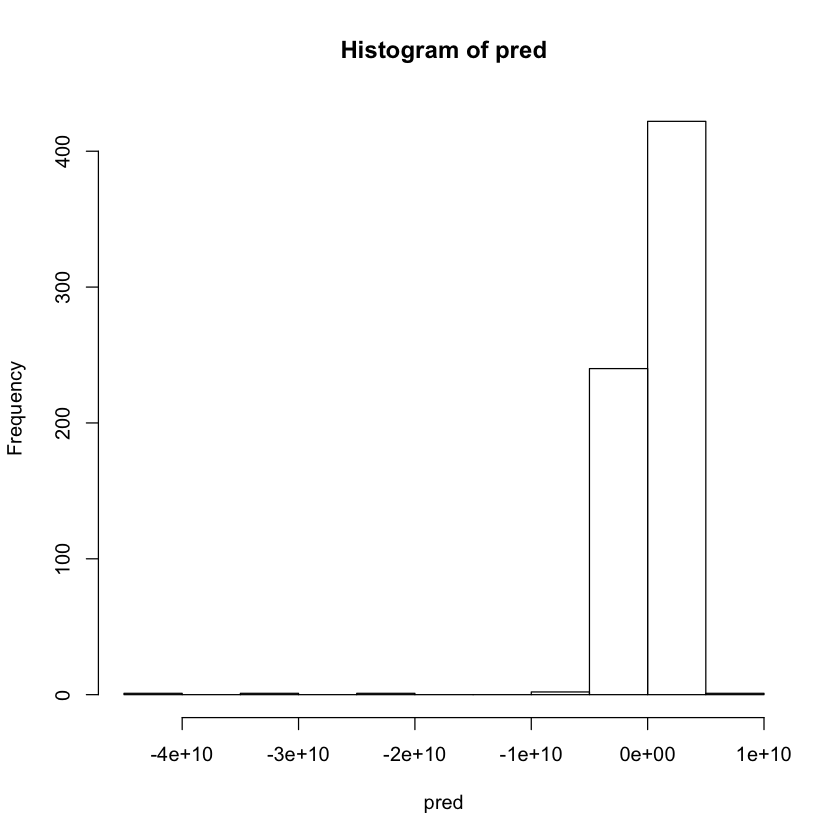

In [33]:
hist(pred)

- Nan값이 나와서 (1시간 30분)
    - RMSLE를 다시 변경

In [35]:
Model <- glmnet(formula = target~. -ID,
                data = data[train, ],
                lambda = 10) # lambda를 작게 잡으면.. ()

pred <- predict(Model, data[valid, ])

RMSLE(pred, data$target[valid])

[1] 9.168337

- 평균쓰는 것(2.1) 보다 겁나 높게 나옴(9.16) ... (1시간 35분)

In [40]:
Model <- glmnet(formula = target~. -ID,
                data = data[train, ],
                lambda = 500000) # lambda를 작게 잡으면.. ()

pred <- predict(Model, data[valid, ])

RMSLE(pred, data$target[valid])

[1] 2.020024

- Regularization의 위력

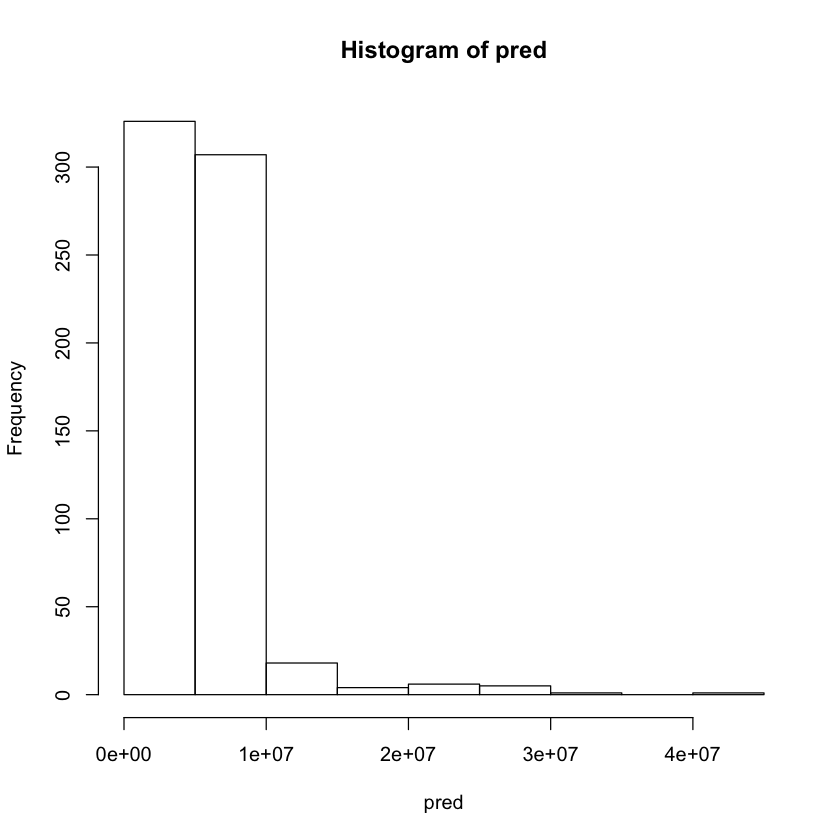

In [42]:
hist(pred)

In [45]:
k <- (1:10) * 100000

for (i in 1:100){
Model <- glmnet(formula = target~. -ID,
                data = data[train, ],
                lambda = k[i]) # lambda를 작게 잡으면.. ()

pred <- predict(Model, data[valid, ])

cat(k[i], "일 때 오차는" , RMSLE(pred, data$target[valid]), "\n")
}

1e+05 일 때 오차는 2.970443 
2e+05 일 때 오차는 2.094045 
3e+05 일 때 오차는 1.99271 
4e+05 일 때 오차는 2.010025 
5e+05 일 때 오차는 2.020024 
6e+05 일 때 오차는 2.028521 
7e+05 일 때 오차는 2.034854 
8e+05 일 때 오차는 2.039733 
9e+05 일 때 오차는 2.044474 
1e+06 일 때 오차는 2.049267 


ERROR: Error in if (any(lambda < 0)) stop("lambdas should be non-negative"): TRUE/FALSE가 필요한 곳에 값이 없습니다


In [46]:
Model <- glmnet(formula = target~. -ID,
                data = data[train, ],
                lambda = 300000,
                alpha = 0.5) # lambda를 작게 잡으면.. ()

pred <- predict(Model, data[valid, ])

RMSLE(pred, data$target[valid])

[1] 2.344554

## Boost
- [lightgbm](https://github.com/Microsoft/LightGBM)
- [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/r-installation-docpage/)

## Xgboost

In [47]:
# install.packages("xgboost")
library(xgboost)


The downloaded binary packages are in
	/var/folders/9h/vzls18sn1pvgfwfymvybqkvw0000gn/T//RtmpmaWlSL/downloaded_packages


In [50]:
X <- model.matrix(target~. -ID, data = data)
Y <- data$target

Model <- xgboost(data = X[train, ],
                 label = Y[train],
                 params = list(eta = 0.3,
                               gamma = 0.1),
                 nrounds = 100
                )

pred <- predict(Model, X[valid, ])

RMSLE(pred, Y[valid])

[1]	train-rmse:8624712.000000 
[2]	train-rmse:7690064.000000 
[3]	train-rmse:7109901.500000 
[4]	train-rmse:6700318.500000 
[5]	train-rmse:6402680.000000 
[6]	train-rmse:6107527.000000 
[7]	train-rmse:5905836.500000 
[8]	train-rmse:5787397.000000 
[9]	train-rmse:5677222.500000 
[10]	train-rmse:5547659.000000 
[11]	train-rmse:5480565.000000 
[12]	train-rmse:5401364.000000 
[13]	train-rmse:5244913.000000 
[14]	train-rmse:5192802.500000 
[15]	train-rmse:5077719.000000 
[16]	train-rmse:5041585.000000 
[17]	train-rmse:4991040.500000 
[18]	train-rmse:4957437.500000 
[19]	train-rmse:4894579.000000 
[20]	train-rmse:4858901.500000 
[21]	train-rmse:4823754.500000 
[22]	train-rmse:4783913.000000 
[23]	train-rmse:4707580.500000 
[24]	train-rmse:4657677.500000 
[25]	train-rmse:4624028.500000 
[26]	train-rmse:4570738.500000 
[27]	train-rmse:4546841.500000 
[28]	train-rmse:4490278.000000 
[29]	train-rmse:4469889.500000 
[30]	train-rmse:4408401.000000 
[31]	train-rmse:4349372.500000 
[32]	train-rmse:4

[1] 2.373922

In [51]:
min(pred)

[1] -2751209

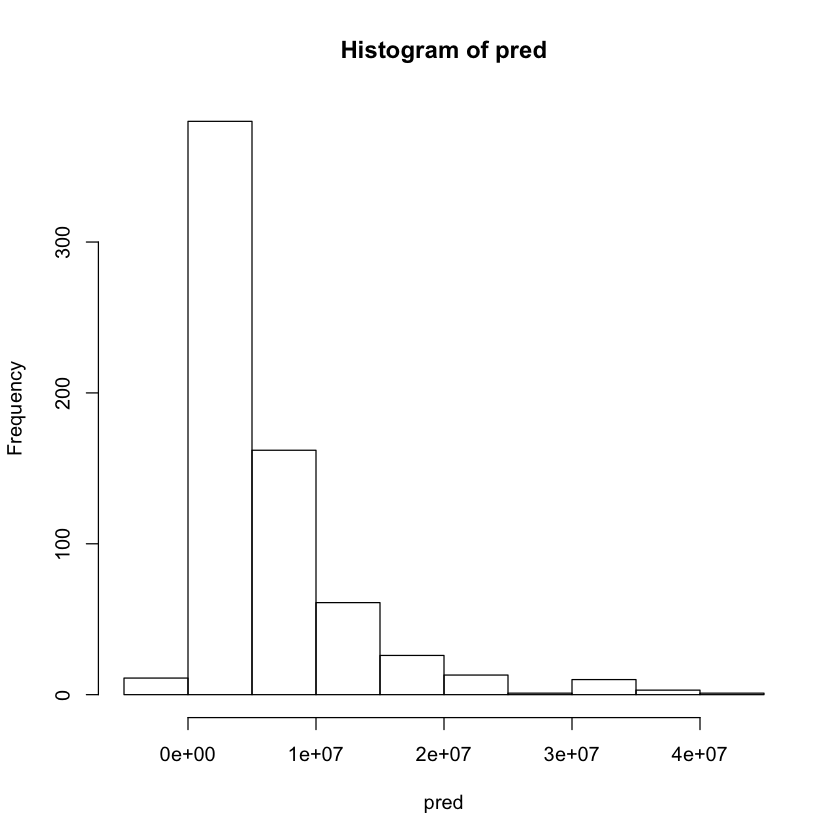

In [52]:
hist(pred)

### xgb.train 

In [58]:
?xgb.train

In [57]:
dtrain <- xgb.DMatrix(X[train, ], label = Y[train])
dvalid <- xgb.DMatrix(X[valid, ], label = Y[valid])

Model <- xgb.train(data = dtrain,
                   params = list(eta = 0.3),
                   watchlist = list(train = dtrain,
                                    eval = dvalid),
                   nrounds = 100)

[1]	train-rmse:8624712.000000	eval-rmse:9174663.000000 
[2]	train-rmse:7690064.000000	eval-rmse:8442111.000000 
[3]	train-rmse:7109901.500000	eval-rmse:8068906.500000 
[4]	train-rmse:6700318.500000	eval-rmse:7810700.000000 
[5]	train-rmse:6402680.000000	eval-rmse:7708963.500000 
[6]	train-rmse:6107527.000000	eval-rmse:7544390.000000 
[7]	train-rmse:5905836.500000	eval-rmse:7443326.500000 
[8]	train-rmse:5787397.000000	eval-rmse:7476746.000000 
[9]	train-rmse:5677222.500000	eval-rmse:7434908.000000 
[10]	train-rmse:5547659.000000	eval-rmse:7418972.500000 
[11]	train-rmse:5480565.000000	eval-rmse:7442603.500000 
[12]	train-rmse:5401364.000000	eval-rmse:7465303.500000 
[13]	train-rmse:5244913.000000	eval-rmse:7445296.500000 
[14]	train-rmse:5192802.500000	eval-rmse:7451585.000000 
[15]	train-rmse:5077719.000000	eval-rmse:7430035.500000 
[16]	train-rmse:5041585.000000	eval-rmse:7447437.000000 
[17]	train-rmse:4991040.500000	eval-rmse:7455458.500000 
[18]	train-rmse:4957437.500000	eval-rmse

#### 뭘 뽑아낼 수 있는지 파악하기

In [59]:
attributes(Model)

$names
[1] "handle"         "raw"            "niter"          "evaluation_log"
[5] "call"           "params"         "callbacks"      "feature_names" 
[9] "nfeatures"     

$class
[1] "xgb.Booster"

In [61]:
attributes(Model$evaluation_log)

$names
[1] "iter"       "train_rmse" "eval_rmse" 

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

$class
[1] "data.table" "data.frame"

$.internal.selfref
<pointer: 0x7f94bd83d0e0>


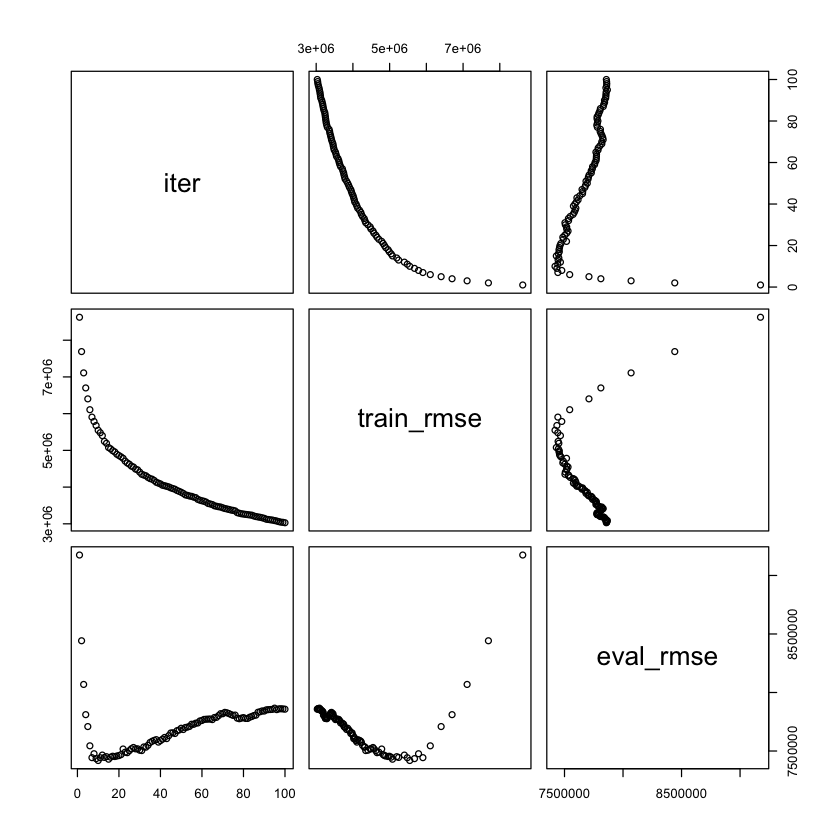

In [60]:
plot(Model$evaluation_log)

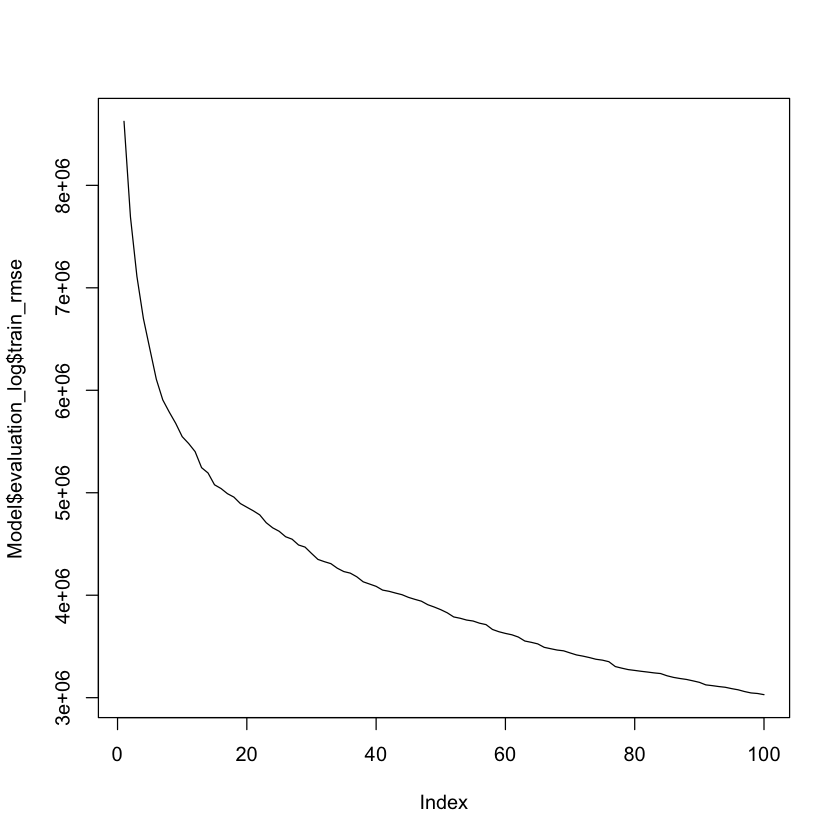

In [62]:
plot(Model$evaluation_log$train_rmse, type = 'l')

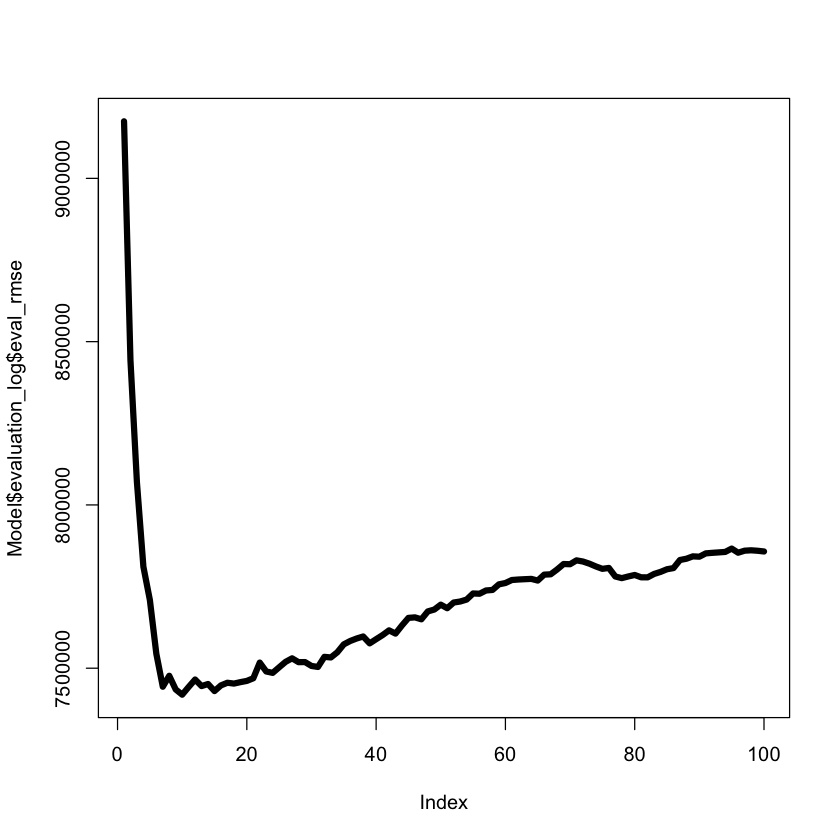

In [64]:
plot(Model$evaluation_log$eval_rmse, type = 'l', lwd = 5)

2시간 25분

In [65]:
Model <- xgb.train(data = dtrain,
                   params = list(eta = 0.3),
                   watchlist = list(train = dtrain,
                                    eval = dvalid),
                   nrounds = 99999999,
                   early_stopping_rounds = 20)

[1]	train-rmse:8624712.000000	eval-rmse:9174663.000000 
Multiple eval metrics are present. Will use eval_rmse for early stopping.
Will train until eval_rmse hasn't improved in 20 rounds.

[2]	train-rmse:7690064.000000	eval-rmse:8442111.000000 
[3]	train-rmse:7109901.500000	eval-rmse:8068906.500000 
[4]	train-rmse:6700318.500000	eval-rmse:7810700.000000 
[5]	train-rmse:6402680.000000	eval-rmse:7708963.500000 
[6]	train-rmse:6107527.000000	eval-rmse:7544390.000000 
[7]	train-rmse:5905836.500000	eval-rmse:7443326.500000 
[8]	train-rmse:5787397.000000	eval-rmse:7476746.000000 
[9]	train-rmse:5677222.500000	eval-rmse:7434908.000000 
[10]	train-rmse:5547659.000000	eval-rmse:7418972.500000 
[11]	train-rmse:5480565.000000	eval-rmse:7442603.500000 
[12]	train-rmse:5401364.000000	eval-rmse:7465303.500000 
[13]	train-rmse:5244913.000000	eval-rmse:7445296.500000 
[14]	train-rmse:5192802.500000	eval-rmse:7451585.000000 
[15]	train-rmse:5077719.000000	eval-rmse:7430035.500000 
[16]	train-rmse:504158

In [66]:
pred <- predict(Model, X[valid, ])
RMSLE(pred, Y[valid])

[1] 1.91072

In [67]:
hyper <- list(eta = 0.01,
              gamma = 0.1,
              subsample = 0.6,
              colsample_bytree = 0.5)

Model <- xgb.train(data = dtrain,
                   params = hyper,
                   watchlist = list(train = dtrain,
                                    eval = dvalid),
                   nrounds = 99999999,
                   early_stopping_rounds = 20)

[1]	train-rmse:10042576.000000	eval-rmse:10446306.000000 
Multiple eval metrics are present. Will use eval_rmse for early stopping.
Will train until eval_rmse hasn't improved in 20 rounds.

[2]	train-rmse:9994329.000000	eval-rmse:10402705.000000 
[3]	train-rmse:9948573.000000	eval-rmse:10361941.000000 
[4]	train-rmse:9901993.000000	eval-rmse:10319112.000000 
[5]	train-rmse:9857224.000000	eval-rmse:10277786.000000 
[6]	train-rmse:9810219.000000	eval-rmse:10233428.000000 
[7]	train-rmse:9763003.000000	eval-rmse:10192245.000000 
[8]	train-rmse:9718208.000000	eval-rmse:10149528.000000 
[9]	train-rmse:9673951.000000	eval-rmse:10109870.000000 
[10]	train-rmse:9631056.000000	eval-rmse:10071295.000000 
[11]	train-rmse:9587865.000000	eval-rmse:10027158.000000 
[12]	train-rmse:9546499.000000	eval-rmse:9988645.000000 
[13]	train-rmse:9506955.000000	eval-rmse:9951806.000000 
[14]	train-rmse:9465593.000000	eval-rmse:9914502.000000 
[15]	train-rmse:9425506.000000	eval-rmse:9876963.000000 
[16]	train

In [68]:
pred <- predict(Model, X[valid, ])
RMSLE(pred, Y[valid])

[1] 1.93664

In [71]:
hyper <- list(objective = "reg:linear",
          booster = "gbtree",
          eval_metric = "rmse",
          nthread = 4,
          eta = 0.01,
          max_depth = 20,
          min_child_weight = 62,
          gamma = 5,
          subsample = 0.9,
          colsample_bytree = 0.3,
          colsample_bylevel = 0.305,
          alpha = 0,
          lambda = 0.8832217
          )


Model <- xgb.train(data = dtrain,
                   params = hyper,
                   watchlist = list(train = dtrain,
                                    eval = dvalid),
                   nrounds = 99999999,
                   early_stopping_rounds = 30)

[1]	train-rmse:10046853.000000	eval-rmse:10449550.000000 
Multiple eval metrics are present. Will use eval_rmse for early stopping.
Will train until eval_rmse hasn't improved in 30 rounds.

[2]	train-rmse:10002297.000000	eval-rmse:10406155.000000 
[3]	train-rmse:9959086.000000	eval-rmse:10364551.000000 
[4]	train-rmse:9915284.000000	eval-rmse:10322498.000000 
[5]	train-rmse:9873206.000000	eval-rmse:10282081.000000 
[6]	train-rmse:9831511.000000	eval-rmse:10241774.000000 
[7]	train-rmse:9790379.000000	eval-rmse:10202412.000000 
[8]	train-rmse:9749414.000000	eval-rmse:10163976.000000 
[9]	train-rmse:9709456.000000	eval-rmse:10125875.000000 
[10]	train-rmse:9669423.000000	eval-rmse:10087719.000000 
[11]	train-rmse:9630395.000000	eval-rmse:10051379.000000 
[12]	train-rmse:9591282.000000	eval-rmse:10014202.000000 
[13]	train-rmse:9554382.000000	eval-rmse:9977959.000000 
[14]	train-rmse:9517008.000000	eval-rmse:9941749.000000 
[15]	train-rmse:9480286.000000	eval-rmse:9906099.000000 
[16]	tra

In [72]:
pred <- predict(Model, X[valid, ])
RMSLE(pred, Y[valid])

[1] 2.465571

In [ ]:
hyper <- list(objective = "reg:linear",
          booster = "gbtree",
          eval_metric = "rmse",
          nthread = 4,
          eta = 0.01,
          max_depth = 20,
          min_child_weight = 62,
          gamma = 5,
          subsample = 0.9,
          colsample_bytree = 0.3,
          colsample_bylevel = 0.305,
          alpha = 0,
          lambda = 0.8832217
          )


Model <- xgb.train(data = dtrain,
                   params = hyper,
                   watchlist = list(train = dtrain,
                                    eval = dvalid),
                   nrounds = 99999999,
                   early_stopping_rounds = 400)

In [ ]:
pred <- predict(Model, X[valid, ])
RMSLE(pred, Y[valid])

In [73]:
for(i in 1:100){
    
hyper <- list(objective = "reg:linear",
          booster = "gbtree",
          eval_metric = "rmse",
          nthread = 4,
          eta = sample(seq(0.01, 0.1, length = 100), 1),
          max_depth = sample(1:30, 1),
          min_child_weight = 62,
          gamma = 5,
          subsample = 0.9,
          colsample_bytree = 0.3,
          colsample_bylevel = 0.305,
          alpha = 0,
          lambda = 0.8832217
          )


Model <- xgb.train(data = dtrain,
                   params = hyper,
                   watchlist = list(train = dtrain,
                                    eval = dvalid),
                   nrounds = 99999999,
                   early_stopping_rounds = 30)
pred <- predict(Model, X[valid, ])
RMSLE(pred, Y[valid])

data.frame(hyper), Model$evaluation_log
    
}

ERROR: Error in parse(text = x, srcfile = src): <text>:27:18: 예기치 않은 ','입니다
26: 
27: data.frame(hyper),
                     ^
